# TensorFlow Tutorial: 2. Machine learning with 3D visualization

*Yen Lee Loh (2023-6-10)*

This is an optional section of the tutorial.  If you wish to run it, you will need to use an OLDER version of JupyterLab.  See Loh knowledgebase.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
rng = np.random.default_rng()
import tensorflow.keras as keras
from tqdm.keras import TqdmCallback
import cute ; import importlib ; importlib.reload (cute) ;

import threed
import pythreejs as p3j


$\newcommand{\mean}[1]{\langle #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 \rvert}$
$\newcommand{\ket}[1]{\lvert #1 \rangle}$
$\newcommand{\adag}{a^\dagger}$
$\newcommand{\mat}[1]{\underline{\underline{\mathbf{#1}}}}$
$\newcommand{\beq}{\qquad\begin{align}}$
$\newcommand{\eeq}{\end{align}}$
$\newcommand{\half}{\frac{1}{2}}$


Let's run our linear regression code again:

Loss =  0.08375836163759232
Weights and biases =  [ 1.011 -1.047] , [0.026]


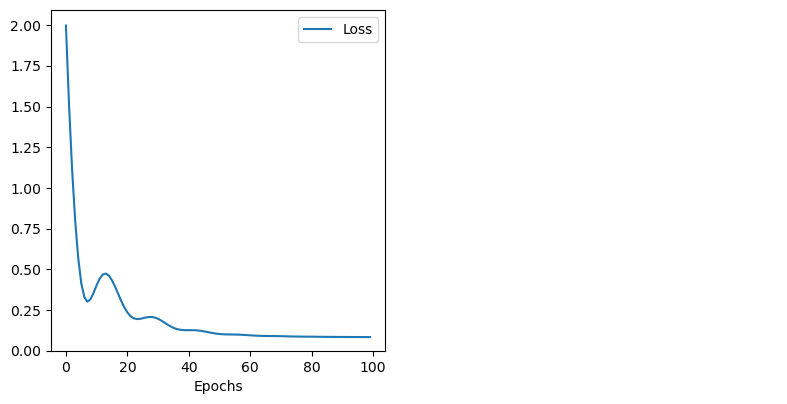

In [47]:
#======== Generate synthetic dataset
nmax = 400
dmax = 2
xndT = rng.uniform (size=(nmax,dmax))
yndT = xndT @ [1,-1] + rng.uniform (-.5, .5, size=(nmax,))    # actually ynT
#======== Build linear model
model = keras.Sequential([
  keras.layers.InputLayer ((2,)),
  keras.layers.Dense      (1)
])
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile (optimizer=optimizer, loss='mean_squared_error')
#model.summary ()
#======== Train and track training
history = model.fit(xndT, yndT, batch_size=nmax, verbose=0, epochs=100)
loss = history.history['loss']
epochs = range(len(loss))
fig,axs = plt.subplots (1,2, figsize=(8,4)); fig.tight_layout(); axs[1].axis('off')
ax = axs[0]
ax.plot (epochs, loss, label='Loss'); ax.set_ylim(bottom=0); ax.set_xlabel('Epochs'); ax.legend()
#======== Evaluate
losses = model.evaluate (xndT, yndT, verbose=0)
print("Loss = ", losses)
#======== Examine model and fit
weights = model.get_layer(index=0).weights[0].numpy()
biases = model.get_layer(index=0).weights[1].numpy()
print ('Weights and biases = ', weights.flatten(), ',', biases)
YndT = model.predict (xndT, verbose=0)

3D graphics using Matplotlib:

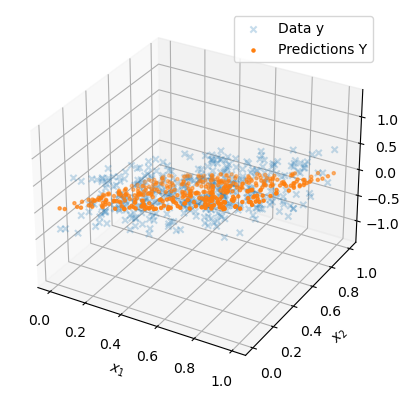

In [48]:
fig = plt.figure()
ax = fig.add_subplot (projection='3d')
ax.scatter (xndT[:,0], xndT[:,1], yndT, marker='x', label='Data y', alpha=.25)
ax.scatter (xndT[:,0], xndT[:,1], YndT, marker='.', label='Predictions Y')
ax.set_xlabel ('$x_1$'); ax.set_ylabel ('$x_2$'); ax.legend();

3D graphics using pythreejs:

In [44]:
pointsxy = np.hstack([xndT, yndT[:,np.newaxis] ])
pointsxY = np.hstack([xndT, YndT ])
objects = []
objects.append ( threed.cylinder ([0,0,0], [1,0,0], radius=.02, color='#FF0000') ) # red x axis
objects.append ( threed.cylinder ([0,0,0], [0,1,0], radius=.02, color='#00FF00') ) # green y axis
objects.append ( threed.cylinder ([0,0,0], [0,0,1], radius=.02, color='#0000FF') ) # blue z axis
for point in pointsxy: objects.append ( threed.sphere (point, radius=.02, color='#FFCC99') )  
for point in pointsxY: objects.append ( threed.sphere (point, radius=.02, color='#9999FF') )  
threed.render (objects, elev=np.radians(15), azim=np.radians(60), imageSize=[640,480], zoomOut=1)

Setting camOri according to elev and azim


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(color='#FFFFFF', posit…

You can click and drag on the above plot to rotate it.  Or, use two fingers on the trackpad or the scroll wheel on your mouse to zoom in and our.